<a href="https://colab.research.google.com/github/eswar554/first_work_progress/blob/main/working_on_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/dataset_weather.csv

--2025-01-19 13:11:49--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/dataset_weather.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.160.30, 52.219.156.194, 52.219.156.102, ...
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.160.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130923 (128K) [text/csv]
Saving to: ‘dataset_weather.csv’

dataset_weather.csv 100%[===================>] 127.85K   185KB/s    in 0.7s    

2025-01-19 13:11:51 (185 KB/s) - ‘dataset_weather.csv’ saved [130923/130923]



In [3]:
weather_df = pd.read_csv("dataset_weather.csv")
weather_df

,city,date,temp,humidity,high_wind,low_wind,events
0,Auckland,2016-01-01,65,82,21,28.0,Rain
1,Auckland,2016-01-02,66,94,33,46.0,Rain
2,Auckland,2016-01-03,72,91,18,NaN,Rain
3,Auckland,2016-01-04,66,76,15,NaN,Rain
4,Auckland,2016-01-05,62,69,13,NaN,NaN
...,...,...,...,...,...,...,...
3650,San Diego,2017-12-27,60,72,13,16.0,NaN
3651,San Diego,2017-12-28,62,62,14,17.0,Fog
3652,San Diego,2017-12-29,63,58,8,10.0,Fog
3653,San Diego,2017-12-30,61,63,13,17.0,Fog


#**Question 1:**

* **Which city has rainfall with the highest frequency in the year 2016?**

In [5]:
weather_df.dropna(how='all',inplace=True)
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year
weather_df["events"]= weather_df["events"].astype('string')
print(weather_df.dtypes)

city                 object
date         datetime64[ns]
temp                  int64
humidity              int64
high_wind             int64
low_wind            float64
events       string[python]
year                  int32
dtype: object


In [7]:
rainfall_df = weather_df[(weather_df['year']==2016)&(weather_df['events']=="Rain")]
citywise_rainfall = rainfall_df.groupby('city').count()['events']
citywise_rainfall.idxmax()

'Auckland'

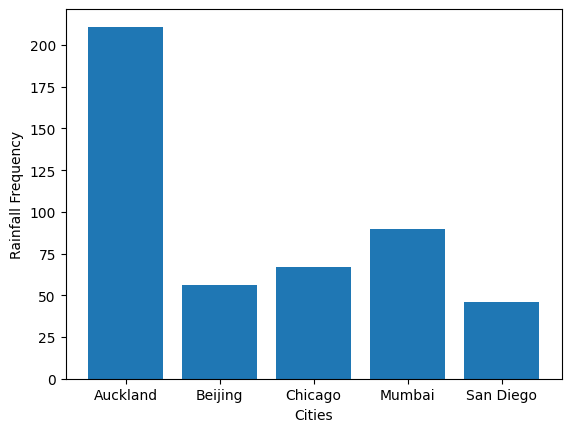

In [10]:
cities = weather_df['city'].unique()
plt.bar(citywise_rainfall.index, citywise_rainfall)
plt.xlabel('Cities')
plt.ylabel('Rainfall Frequency')
plt.show()

#**Question 2:**

* **Which month in each city has recorded the highest average temperature in the year 2017?**

In [18]:
weather_df['month'] = weather_df['date'].dt.month
weather_month_names_df = weather_df.copy()
weather_month_names_df["month"].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}, inplace=True)
weather_month_names_df

<ipython-input-18-f371b605f975>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_month_names_df["month"].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}, inplace=True)


,city,date,temp,humidity,high_wind,low_wind,events,year,month
0,Auckland,2016-01-01,65,82,21,28.0,Rain,2016,January
1,Auckland,2016-01-02,66,94,33,46.0,Rain,2016,January
2,Auckland,2016-01-03,72,91,18,NaN,Rain,2016,January
3,Auckland,2016-01-04,66,76,15,NaN,Rain,2016,January
4,Auckland,2016-01-05,62,69,13,NaN,<NA>,2016,January
...,...,...,...,...,...,...,...,...,...
3650,San Diego,2017-12-27,60,72,13,16.0,<NA>,2017,December
3651,San Diego,2017-12-28,62,62,14,17.0,Fog,2017,December
3652,San Diego,2017-12-29,63,58,8,10.0,Fog,2017,December
3653,San Diego,2017-12-30,61,63,13,17.0,Fog,2017,December


In [19]:

weather_2017_df = weather_month_names_df[(weather_month_names_df['year']==2017)]
monthly_avg_temp = weather_2017_df.groupby(['city','month'])['temp'].mean()
monthly_avg_temp_df = pd.DataFrame(monthly_avg_temp)
monthly_avg_temp_df.rename(columns={"temp": "avg_temp"}, inplace=True)

monthly_avg_temp_df.reset_index(inplace = True)
max_temp_indices = monthly_avg_temp_df.groupby('city')['avg_temp'].idxmax()
max_monthly_temp_df = monthly_avg_temp_df.loc[max_temp_indices]
max_monthly_temp_df

,city,month,avg_temp
3,Auckland,February,68.571429
17,Beijing,July,81.161290
29,Chicago,July,74.903226
44,Mumbai,May,85.870968
49,San Diego,August,73.322581


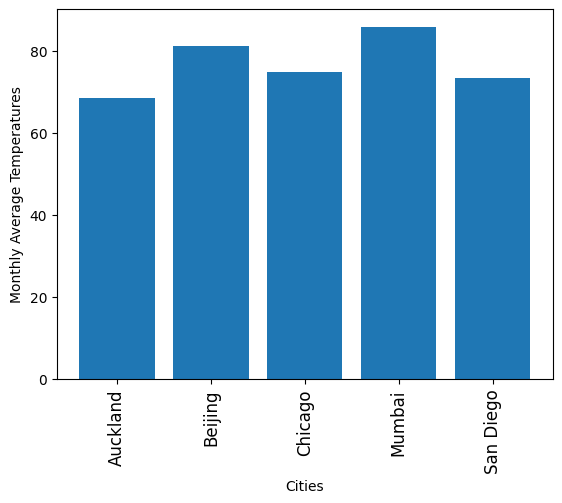

In [20]:
cities = max_monthly_temp_df['city']
avg_temperatures = max_monthly_temp_df['avg_temp']
plt.bar(cities, avg_temperatures)
plt.xticks(cities, rotation = 'vertical', size = 12)
plt.xlabel('Cities')
plt.ylabel('Monthly Average Temperatures')
plt.show()

#**Question 3:**

* **What is the maximum and minimum humidity recorded in each city in the year 2017?**



In [21]:
weather_2017_df = weather_df[(weather_df['year']==2017)]
city_weather_df = weather_2017_df.groupby('city')
humidity_df = city_weather_df['humidity'].agg(['max', 'min'])
humidity_df

,max,min
city,,
Auckland,97,52
Beijing,95,12
Chicago,96,29
Mumbai,95,29
San Diego,88,19


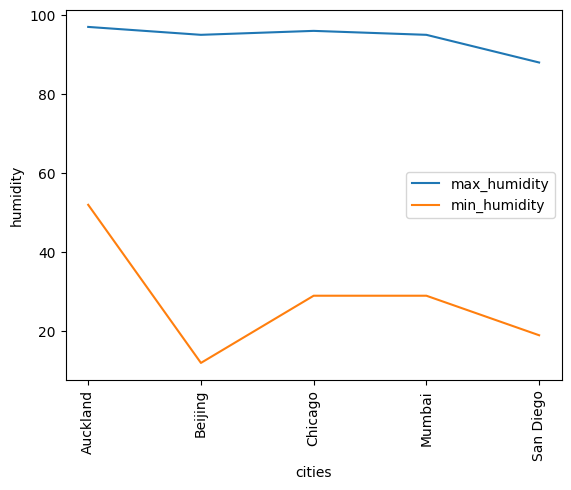

In [22]:
cities = humidity_df.index.values
max_humidity = humidity_df['max']
min_humidity = humidity_df['min']
plt.plot(cities, max_humidity, label='max humidity')
plt.plot(cities, min_humidity, label='min humidity')

plt.xticks(cities, rotation='vertical')
plt.xlabel('cities')
plt.ylabel('humidity')
plt.legend(["max_humidity", "min_humidity"])

plt.show()

#**Question 4:**

* **What is the average of `high_wind` and `low_wind` of Beijing city in between `July 2016` to `February 2017` ?**
* **What is the maximum of the average wind calculated above in each month ?**

In [23]:
beijing_df = weather_df[(weather_df['city']=='Beijing')&(((weather_df['year']==2016)&(weather_df['month']>6))|((weather_df['year']==2017)&(weather_df['month']<3)))]
wind_cols = beijing_df.loc[: , ["high_wind","low_wind"]]
beijing_df['average_wind'] = wind_cols.mean(axis=1)

max_wind = beijing_df.groupby(['year', 'month'])['average_wind'].max().reset_index()
max_wind["month"].replace({1: "Jan", 2: "Feb", 7: "July", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}, inplace=True)
max_wind

<ipython-input-23-475f937332f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df['average_wind'] = wind_cols.mean(axis=1)
<ipython-input-23-475f937332f1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  max_wind["month"].replace({1: "Jan", 2: "Feb", 7: "July", 8: "Aug", 9: "Se

,year,month,average_wind
0,2016,July,32.5
1,2016,Aug,30.5
2,2016,Sep,32.5
3,2016,Oct,28.0
4,2016,Nov,33.5
5,2016,Dec,39.0
6,2017,Jan,47.0
7,2017,Feb,36.5


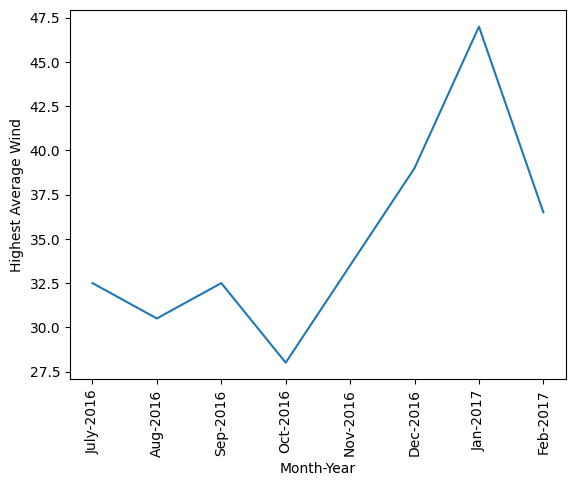

In [24]:
month_year = max_wind['month'] + '-' + max_wind['year'].astype('string')
month_year = month_year.to_list()

highest_average_wind = max_wind['average_wind']
plt.plot(month_year, highest_average_wind)

plt.xticks(month_year, rotation='vertical')
plt.ylabel('Highest Average Wind')
plt.xlabel('Month-Year')
plt.show()